# Análisis exploratorio de datos sobre las muertes mundiales

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


### Importamos el dataset de muertes

In [3]:
MainData = pd.read_csv("Data/20220327 annual-number-of-deaths-by-cause.csv")


In [91]:
MainData

,Entity,Code,Year,Number of executions (Amnesty International),Deaths - Meningitis - Sex: Both - Age: All Ages (Number),Deaths - Neoplasms - Sex: Both - Age: All Ages (Number),"Deaths - Fire, heat, and hot substances - Sex: Both - Age: All Ages (Number)",Deaths - Malaria - Sex: Both - Age: All Ages (Number),Deaths - Drowning - Sex: Both - Age: All Ages (Number),Deaths - Interpersonal violence - Sex: Both - Age: All Ages (Number),...,Deaths - Protein-energy malnutrition - Sex: Both - Age: All Ages (Number),Terrorism (deaths),Deaths - Cardiovascular diseases - Sex: Both - Age: All Ages (Number),Deaths - Chronic kidney disease - Sex: Both - Age: All Ages (Number),Deaths - Chronic respiratory diseases - Sex: Both - Age: All Ages (Number),Deaths - Cirrhosis and other chronic liver diseases - Sex: Both - Age: All Ages (Number),Deaths - Digestive diseases - Sex: Both - Age: All Ages (Number),Deaths - Acute hepatitis - Sex: Both - Age: All Ages (Number),Deaths - Alzheimer's disease and other dementias - Sex: Both - Age: All Ages (Number),Deaths - Parkinson's disease - Sex: Both - Age: All Ages (Number)
0,Afghanistan,AFG,2007,15,2933.0,15925.0,481.0,393.0,2127.0,3657.0,...,2439.0,1199.0,53962.0,4490.0,7222.0,3346.0,6458.0,3437.0,1402.0,450.0
1,Afghanistan,AFG,2008,17,2731.0,16148.0,462.0,255.0,1973.0,3785.0,...,2231.0,1092.0,54051.0,4534.0,7143.0,3316.0,6408.0,3005.0,1424.0,455.0
2,Afghanistan,AFG,2009,0,2460.0,16383.0,448.0,239.0,1852.0,3874.0,...,1998.0,1065.0,53964.0,4597.0,7045.0,3291.0,6358.0,2663.0,1449.0,460.0
3,Afghanistan,AFG,2011,2,2327.0,17094.0,448.0,390.0,1775.0,4170.0,...,1805.0,1525.0,54347.0,4785.0,6916.0,3318.0,6370.0,2365.0,1508.0,473.0
4,Afghanistan,AFG,2012,14,2254.0,17522.0,445.0,94.0,1716.0,4245.0,...,1667.0,3521.0,54868.0,4846.0,6878.0,3353.0,6398.0,2264.0,1544.0,482.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8249,Zimbabwe,ZWE,2015,NaN,1439.0,11161.0,632.0,2518.0,770.0,1302.0,...,2990.0,NaN,16649.0,2108.0,2751.0,1956.0,4202.0,146.0,754.0,215.0
8250,Zimbabwe,ZWE,2016,NaN,1457.0,11465.0,648.0,2050.0,801.0,1342.0,...,3027.0,NaN,16937.0,2160.0,2788.0,1962.0,4264.0,146.0,767.0,219.0
8251,Zimbabwe,ZWE,2017,NaN,1460.0,11744.0,654.0,2116.0,818.0,1363.0,...,2962.0,0.0,17187.0,2196.0,2818.0,2007.0,4342.0,144.0,781.0,223.0
8252,Zimbabwe,ZWE,2018,NaN,1450.0,12038.0,657.0,2088.0,825.0,1396.0,...,2890.0,NaN,17460.0,2240.0,2849.0,2030.0,4377.0,139.0,795.0,227.0


In [92]:
MainData.sort_values(by=["Entity","Year"], inplace=True)

In [93]:
MainData.reset_index(drop=True, inplace = True)

In [94]:
MainData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8254 entries, 0 to 8253
Data columns (total 36 columns):
 #   Column                                                                                    Non-Null Count  Dtype  
---  ------                                                                                    --------------  -----  
 0   Entity                                                                                    8254 non-null   object 
 1   Code                                                                                      6206 non-null   object 
 2   Year                                                                                      8254 non-null   int64  
 3   Number of executions (Amnesty International)                                              267 non-null    object 
 4   Deaths - Meningitis - Sex: Both - Age: All Ages (Number)                                  8010 non-null   float64
 5   Deaths - Neoplasms - Sex: Both - Age: All Ages (Number)

In [95]:
MainData.isnull().sum()

Entity                                                                                         0
Code                                                                                        2048
Year                                                                                           0
Number of executions (Amnesty International)                                                7987
Deaths - Meningitis - Sex: Both - Age: All Ages (Number)                                     244
Deaths - Neoplasms - Sex: Both - Age: All Ages (Number)                                      244
Deaths - Fire, heat, and hot substances - Sex: Both - Age: All Ages (Number)                 244
Deaths - Malaria - Sex: Both - Age: All Ages (Number)                                        244
Deaths - Drowning - Sex: Both - Age: All Ages (Number)                                       244
Deaths - Interpersonal violence - Sex: Both - Age: All Ages (Number)                         244
Deaths - HIV/AIDS - Sex: Both 

### Data.Limpieza de columnas con muchos valores nulos

In [96]:
MainData.dropna(axis = 1, thresh=len(MainData)/2, inplace=True)

In [98]:
MainData.isnull().sum()

Entity                                                                                         0
Code                                                                                        2048
Year                                                                                           0
Deaths - Meningitis - Sex: Both - Age: All Ages (Number)                                     244
Deaths - Neoplasms - Sex: Both - Age: All Ages (Number)                                      244
Deaths - Fire, heat, and hot substances - Sex: Both - Age: All Ages (Number)                 244
Deaths - Malaria - Sex: Both - Age: All Ages (Number)                                        244
Deaths - Drowning - Sex: Both - Age: All Ages (Number)                                       244
Deaths - Interpersonal violence - Sex: Both - Age: All Ages (Number)                         244
Deaths - HIV/AIDS - Sex: Both - Age: All Ages (Number)                                       244
Deaths - Drug use disorders - 

### MainData. Limpieza de registros con valores nulos

In [99]:
MainData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8254 entries, 0 to 8253
Data columns (total 34 columns):
 #   Column                                                                                    Non-Null Count  Dtype  
---  ------                                                                                    --------------  -----  
 0   Entity                                                                                    8254 non-null   object 
 1   Code                                                                                      6206 non-null   object 
 2   Year                                                                                      8254 non-null   int64  
 3   Deaths - Meningitis - Sex: Both - Age: All Ages (Number)                                  8010 non-null   float64
 4   Deaths - Neoplasms - Sex: Both - Age: All Ages (Number)                                   8010 non-null   float64
 5   Deaths - Fire, heat, and hot substances - Sex: Both - A

### Importamos el dataset de países para ver los registros con los que quedarnos

In [110]:
Paises = pd.read_csv("Data/all_countries.csv", names = ["Countries"])

In [ ]:
Paises = Paises.append({"Countries":"Australia"}, ignore_index = True)
Paises = Paises.append({"Countries":"Bahamas"}, ignore_index = True)
Paises = Paises.append({"Countries":"Bosnia-Herzegovina"}, ignore_index = True)
Paises = Paises.append({"Countries":"Bermuda"}, ignore_index = True)
Paises = Paises.append({"Countries":"Cape Verde"}, ignore_index = True)
Paises = Paises.append({"Countries":"Cook Islands"}, ignore_index = True)
Paises = Paises.append({"Countries":"Cote d'Ivoire"}, ignore_index = True)
Paises = Paises.append({"Countries":'Czechia'}, ignore_index = True)
Paises = Paises.append({"Countries":'Democratic Republic of Congo'}, ignore_index = True)
Paises = Paises.append({"Countries":'England'}, ignore_index = True)
Paises = Paises.append({"Countries":'Fiji'}, ignore_index = True)
Paises = Paises.append({"Countries":'French Polynesia'}, ignore_index = True)
Paises = Paises.append({"Countries":'Greenland'}, ignore_index = True)
Paises = Paises.append({"Countries":'Guadeloupe'}, ignore_index = True)
Paises = Paises.append({"Countries":'Guam'}, ignore_index = True)
Paises = Paises.append({"Countries":'Kiribati'}, ignore_index = True)
Paises = Paises.append({"Countries":'Macau'}, ignore_index = True)
Paises = Paises.append({"Countries":'Martinique'}, ignore_index = True)
Paises = Paises.append({"Countries":'Marshall Islands'}, ignore_index = True)
Paises = Paises.append({"Countries":'Micronesia (country)'}, ignore_index = True)
Paises = Paises.append({"Countries":'Nauru'}, ignore_index = True)
Paises = Paises.append({"Countries":'New Caledonia'}, ignore_index = True)
Paises = Paises.append({"Countries":'New Zealand'}, ignore_index = True)
Paises = Paises.append({"Countries":'Niue'}, ignore_index = True)
Paises = Paises.append({"Countries":'Northern Ireland'}, ignore_index = True)
Paises = Paises.append({"Countries":'Northern Mariana Islands'}, ignore_index = True)
Paises = Paises.append({"Countries":'Palau'}, ignore_index = True)
Paises = Paises.append({"Countries":'Papua New Guinea'}, ignore_index = True)
Paises = Paises.append({"Countries":'Puerto Rico'}, ignore_index = True)
Paises = Paises.append({"Countries":'Samoa'}, ignore_index = True)
Paises = Paises.append({"Countries":'Sao Tome and Principe'}, ignore_index = True)
Paises = Paises.append({"Countries":'Scotland'}, ignore_index = True)
Paises = Paises.append({"Countries":'Solomon Islands'}, ignore_index = True)
Paises = Paises.append({"Countries":'Timor'}, ignore_index = True)
Paises = Paises.append({"Countries":'Tonga'}, ignore_index = True)
Paises = Paises.append({"Countries":'Tuvalu'}, ignore_index = True)
Paises = Paises.append({"Countries":'Vanuatu'}, ignore_index = True)
Paises = Paises.append({"Countries":'Wallis and Futuna'}, ignore_index = True)
Paises = Paises.append({"Countries":'Wales'}, ignore_index = True)
Paises = Paises.append({"Countries":'Puerto Rico'}, ignore_index = True)
Paises = Paises.append({"Countries":'Puerto Rico'}, ignore_index = True)


In [ ]:
SiPaises = MainData[(MainData["Entity"].isin (Paises.Countries))]
NoPaises= MainData[~(MainData["Entity"].isin (Paises.Countries))]

In [ ]:
len(NoPaises)

In [ ]:
MainData = SiPaises.copy()

In [12]:
MainData.dropna(axis = 0, thresh = 4, inplace=True)

In [134]:
MainData.loc[:, "Deaths - Meningitis - Sex: Both - Age: All Ages (Number)":] = MainData.loc[:, "Deaths - Meningitis - Sex: Both - Age: All Ages (Number)":].astype("int64")

IntCastingNaNError: Cannot convert non-finite values (NA or inf) to integer

In [14]:
MainData.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8010 entries, 0 to 8253
Data columns (total 34 columns):
 #   Column                                                                                    Non-Null Count  Dtype 
---  ------                                                                                    --------------  ----- 
 0   Entity                                                                                    8010 non-null   object
 1   Code                                                                                      6150 non-null   object
 2   Year                                                                                      8010 non-null   int64 
 3   Deaths - Meningitis - Sex: Both - Age: All Ages (Number)                                  8010 non-null   int64 
 4   Deaths - Neoplasms - Sex: Both - Age: All Ages (Number)                                   8010 non-null   int64 
 5   Deaths - Fire, heat, and hot substances - Sex: Both - Age: All

In [15]:
MainData.describe()

,Year,Deaths - Meningitis - Sex: Both - Age: All Ages (Number),Deaths - Neoplasms - Sex: Both - Age: All Ages (Number),"Deaths - Fire, heat, and hot substances - Sex: Both - Age: All Ages (Number)",Deaths - Malaria - Sex: Both - Age: All Ages (Number),Deaths - Drowning - Sex: Both - Age: All Ages (Number),Deaths - Interpersonal violence - Sex: Both - Age: All Ages (Number),Deaths - HIV/AIDS - Sex: Both - Age: All Ages (Number),Deaths - Drug use disorders - Sex: Both - Age: All Ages (Number),Deaths - Tuberculosis - Sex: Both - Age: All Ages (Number),...,Deaths - Poisonings - Sex: Both - Age: All Ages (Number),Deaths - Protein-energy malnutrition - Sex: Both - Age: All Ages (Number),Deaths - Cardiovascular diseases - Sex: Both - Age: All Ages (Number),Deaths - Chronic kidney disease - Sex: Both - Age: All Ages (Number),Deaths - Chronic respiratory diseases - Sex: Both - Age: All Ages (Number),Deaths - Cirrhosis and other chronic liver diseases - Sex: Both - Age: All Ages (Number),Deaths - Digestive diseases - Sex: Both - Age: All Ages (Number),Deaths - Acute hepatitis - Sex: Both - Age: All Ages (Number),Deaths - Alzheimer's disease and other dementias - Sex: Both - Age: All Ages (Number),Deaths - Parkinson's disease - Sex: Both - Age: All Ages (Number)
count,8010.000000,8010.000000,8.010000e+03,8010.000000,8010.000000,8010.000000,8010.000000,8.010000e+03,8010.000000,8.010000e+03,...,8010.000000,8010.000000,8.010000e+03,8.010000e+03,8.010000e+03,8.010000e+03,8.010000e+03,8010.000000,8.010000e+03,8010.000000
mean,2004.500000,12909.701124,2.983985e+05,4444.838077,31812.044569,12532.637953,15315.848315,4.725143e+04,3469.958926,5.605527e+04,...,3189.111111,14441.384519,5.672777e+05,3.614545e+04,1.315012e+05,4.668634e+04,8.261491e+04,4586.226592,3.923395e+04,9367.016979
std,8.655982,41799.388071,8.643901e+05,12111.913749,123035.872293,40095.990735,42888.544878,1.744798e+05,11186.514866,1.837876e+05,...,9180.094933,47987.721059,1.606918e+06,1.028788e+05,4.174924e+05,1.282383e+05,2.253554e+05,16692.425941,1.179772e+05,27358.717966
min,1990.000000,0.000000,1.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000e+00,...,0.000000,0.000000,4.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000
25%,1997.000000,29.000000,1.934250e+03,35.000000,0.000000,58.000000,76.250000,2.600000e+01,7.000000,6.200000e+01,...,13.000000,10.000000,4.348500e+03,2.810000e+02,5.262500e+02,3.040000e+02,5.990000e+02,3.000000,2.010000e+02,55.000000
50%,2004.500000,294.000000,1.033850e+04,244.000000,1.000000,393.500000,494.000000,4.200000e+02,57.000000,9.560000e+02,...,125.000000,233.500000,2.326550e+04,1.651000e+03,2.960500e+03,2.134000e+03,4.032500e+03,47.000000,1.337000e+03,331.000000
75%,2012.000000,3187.750000,9.186925e+04,1470.750000,2462.000000,3017.750000,4372.500000,9.484500e+03,518.750000,1.037775e+04,...,797.750000,4245.000000,1.663318e+05,1.192175e+04,2.815650e+04,1.680225e+04,2.838875e+04,453.750000,1.186775e+04,2954.000000
max,2019.000000,432524.000000,1.007964e+07,129705.000000,961129.000000,460665.000000,463129.000000,1.844490e+06,128083.000000,1.808478e+06,...,92101.000000,656314.000000,1.856251e+07,1.427232e+06,3.974315e+06,1.472012e+06,2.557689e+06,166405.000000,1.623276e+06,362907.000000


In [16]:
MainData["Year"].value_counts()

1990    267
1991    267
2018    267
2017    267
2016    267
2015    267
2014    267
2013    267
2012    267
2011    267
2010    267
2009    267
2008    267
2007    267
2006    267
2005    267
2004    267
2003    267
2002    267
2001    267
2000    267
1999    267
1998    267
1997    267
1996    267
1995    267
1994    267
1993    267
1992    267
2019    267
Name: Year, dtype: int64

In [17]:
MainData.reset_index(drop= True, inplace=True)

In [18]:
MainData.Year.unique()

array([1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000,
       2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011,
       2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019], dtype=int64)

### Importamos el dataset de la población mundial por año

In [19]:
PoblacionMundial = pd.read_csv("Data/evolucion_de_la_poblacion_mundial.csv", sep = ";")

In [20]:
PoblacionMundial.head()

,Año,Periodo,Personas
0,1950,Año,2.477.675
1,1951,Año,2.520.970
2,1952,Año,2.565.291
3,1953,Año,2.615.251
4,1954,Año,2.665.307


In [21]:
PoblacionMundial.tail()

,Año,Periodo,Personas
81,NaN,NaN,NaN
82,NaN,NaN,NaN
83,"Url:""https://www.epdata.es/evolucion-prevista-...",NaN,NaN
84,"Titulo:""Evolución de la población mundial""",NaN,NaN
85,"Subtitulo:""En 2021 alcanzó 7.876 millones de p...",NaN,NaN


### PoblacionMundial. Limpieza de registros con valores nulos

In [22]:
PoblacionMundial.dropna(axis= 0, inplace = True)
PoblacionMundial.drop("Periodo", axis = 1, inplace=True)

In [23]:
PoblacionMundial

,Año,Personas
0,1950,2.477.675
1,1951,2.520.970
2,1952,2.565.291
3,1953,2.615.251
4,1954,2.665.307
...,...,...
67,2017,7.556.993
68,2018,7.642.651
69,2019,7.724.928
70,2020,7.804.974


In [24]:
PoblacionMundial["Año"] = PoblacionMundial["Año"].astype("int64")

In [25]:
PoblacionMundial = PoblacionMundial[(1990 <= PoblacionMundial["Año"]) & (PoblacionMundial["Año"] <= 2019)]

In [26]:
PoblacionMundial.reset_index(drop = True, inplace=True)

In [27]:
PoblacionMundial.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Año       30 non-null     int64 
 1   Personas  30 non-null     object
dtypes: int64(1), object(1)
memory usage: 608.0+ bytes


In [28]:
PoblacionMundial["Personas"] = PoblacionMundial["Personas"].str.split(".")

c:\Users\tonim\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [29]:
PoblacionMundial["Personas"]

0     [5, 269, 760]
1     [5, 362, 591]
2     [5, 449, 900]
3     [5, 535, 472]
4     [5, 619, 395]
5     [5, 702, 061]
6     [5, 784, 378]
7     [5, 865, 912]
8     [5, 947, 050]
9     [6, 027, 575]
10    [6, 107, 942]
11    [6, 189, 856]
12    [6, 271, 638]
13    [6, 353, 177]
14    [6, 434, 620]
15    [6, 516, 883]
16    [6, 599, 469]
17    [6, 683, 363]
18    [6, 768, 534]
19    [6, 854, 661]
20    [6, 941, 951]
21    [7, 029, 255]
22    [7, 116, 996]
23    [7, 206, 400]
24    [7, 294, 787]
25    [7, 383, 240]
26    [7, 469, 955]
27    [7, 556, 993]
28    [7, 642, 651]
29    [7, 724, 928]
Name: Personas, dtype: object

In [30]:
lista = []
for i in PoblacionMundial["Personas"].str[:]:
    lista.append("".join(i))

In [31]:
lista

['5269760',
 '5362591',
 '5449900',
 '5535472',
 '5619395',
 '5702061',
 '5784378',
 '5865912',
 '5947050',
 '6027575',
 '6107942',
 '6189856',
 '6271638',
 '6353177',
 '6434620',
 '6516883',
 '6599469',
 '6683363',
 '6768534',
 '6854661',
 '6941951',
 '7029255',
 '7116996',
 '7206400',
 '7294787',
 '7383240',
 '7469955',
 '7556993',
 '7642651',
 '7724928']

In [32]:
PoblacionMundial["Personas"] = lista

c:\Users\tonim\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [33]:
PoblacionMundial

,Año,Personas
0,1990,5269760
1,1991,5362591
2,1992,5449900
3,1993,5535472
4,1994,5619395
5,1995,5702061
6,1996,5784378
7,1997,5865912
8,1998,5947050
9,1999,6027575


In [34]:
PoblacionMundial["Personas"] = PoblacionMundial["Personas"].astype("int64")

c:\Users\tonim\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [35]:
PoblacionMundial["Personas"] = PoblacionMundial["Personas"]*1000

c:\Users\tonim\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [36]:
PoblacionMundial

,Año,Personas
0,1990,5269760000
1,1991,5362591000
2,1992,5449900000
3,1993,5535472000
4,1994,5619395000
5,1995,5702061000
6,1996,5784378000
7,1997,5865912000
8,1998,5947050000
9,1999,6027575000


In [37]:
PoblacionMundial.rename(columns = {"Año": "Year"}, inplace=True)
PoblacionMundial.rename(columns = {"Personas": "Poblacion"}, inplace=True)

c:\Users\tonim\AppData\Local\Programs\Python\Python37\lib\site-packages\pandas\core\frame.py:5047: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [38]:
PoblacionMundial.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   Year       30 non-null     int64
 1   Poblacion  30 non-null     int64
dtypes: int64(2)
memory usage: 608.0 bytes


In [39]:
PoblacionMundial.tail()

,Year,Poblacion
25,2015,7383240000
26,2016,7469955000
27,2017,7556993000
28,2018,7642651000
29,2019,7724928000


In [40]:
PoblacionMundial.describe()

,Year,Poblacion
count,30.000000,3.000000e+01
mean,2004.500000,6.490380e+09
std,8.803408,7.403021e+08
min,1990.000000,5.269760e+09
25%,1997.250000,5.886196e+09
50%,2004.500000,6.475752e+09
75%,2011.750000,7.095061e+09
max,2019.000000,7.724928e+09


### Importamos el dataset de la población de España por año

In [41]:
PoblacionEspana = pd.read_csv("Data/evolucionPoblacionEspana.csv", header = 6)
PoblacionEspana.head()

,PERIODO,VALOR,TIPO DATO,NOTA
0,2022S1,47.432.805,Provisional,NaN
1,2021S2,47.331.545,Provisional,NaN
2,2021S1,47.398.695,Definitivo,NaN
3,2020S2,47.355.685,Definitivo,NaN
4,2020S1,47.332.614,Definitivo,NaN


In [42]:
PoblacionEspana.tail()

,PERIODO,VALOR,TIPO DATO,NOTA
100,1972S1,34.408.338,Definitivo,NaN
101,1971S2,34.216.856,Definitivo,NaN
102,1971S1,34.040.642,Definitivo,NaN
103,Dato: .. Dato no disponible,NaN,NaN,NaN
104,Dato: . Protegido por secreto estadístico,NaN,NaN,NaN


In [43]:
PoblacionEspana.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105 entries, 0 to 104
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   PERIODO    105 non-null    object 
 1   VALOR      103 non-null    object 
 2   TIPO DATO  103 non-null    object 
 3   NOTA       0 non-null      float64
dtypes: float64(1), object(3)
memory usage: 3.4+ KB


### PoblacionEspana. Limpieza de registros con valores nulos

In [44]:
PoblacionEspana.drop(["NOTA"], axis = 1, inplace=True)
PoblacionEspana.drop(["TIPO DATO"], axis = 1, inplace=True)

In [45]:
PoblacionEspana.dropna(axis = 0, inplace = True)

In [46]:
PoblacionEspana["PERIODO"] = PoblacionEspana["PERIODO"].str[:4]

In [47]:
PoblacionEspana

,PERIODO,VALOR
0,2022,47.432.805
1,2021,47.331.545
2,2021,47.398.695
3,2020,47.355.685
4,2020,47.332.614
...,...,...
98,1973,34.800.600
99,1972,34.595.886
100,1972,34.408.338
101,1971,34.216.856


In [48]:
PoblacionEspana.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 103 entries, 0 to 102
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   PERIODO  103 non-null    object
 1   VALOR    103 non-null    object
dtypes: object(2)
memory usage: 2.4+ KB


In [49]:
PoblacionEspana["PERIODO"] = PoblacionEspana["PERIODO"].astype("int64")

In [50]:
PoblacionEspana["VALOR"] = PoblacionEspana["VALOR"].str.split(".")

In [51]:
lista = []

In [52]:
for i in PoblacionEspana["VALOR"].str[:]:
    lista.append("".join(i))

In [53]:
PoblacionEspana["VALOR"] = lista

In [54]:
PoblacionEspana

,PERIODO,VALOR
0,2022,47432805
1,2021,47331545
2,2021,47398695
3,2020,47355685
4,2020,47332614
...,...,...
98,1973,34800600
99,1972,34595886
100,1972,34408338
101,1971,34216856


In [55]:
PoblacionEspana["VALOR"] = PoblacionEspana["VALOR"].astype("int64")

In [56]:
PoblacionEspana.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 103 entries, 0 to 102
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   PERIODO  103 non-null    int64
 1   VALOR    103 non-null    int64
dtypes: int64(2)
memory usage: 2.4 KB


In [57]:
PoblacionEspana = PoblacionEspana.groupby("PERIODO")["VALOR"].max().reset_index()

In [58]:
PoblacionEspana = PoblacionEspana[(1990 <= PoblacionEspana.PERIODO) & (PoblacionEspana.PERIODO <= 2019)].reset_index(drop=True)

In [59]:
PoblacionEspana["VALOR"] = PoblacionEspana["VALOR"].astype("int64")

In [60]:
PoblacionEspana.rename(columns = {"PERIODO":"Year"}, inplace = True)
PoblacionEspana.rename(columns = {"VALOR":"Poblacion"}, inplace = True)

In [61]:
PoblacionEspana.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   Year       30 non-null     int64
 1   Poblacion  30 non-null     int64
dtypes: int64(2)
memory usage: 608.0 bytes


In [62]:
PoblacionEspana.describe()

,Year,Poblacion
count,30.000000,3.000000e+01
mean,2004.500000,4.320411e+07
std,8.803408,3.175346e+06
min,1990.000000,3.886083e+07
25%,1997.250000,4.009100e+07
50%,2004.500000,4.326089e+07
75%,2011.750000,4.649662e+07
max,2019.000000,4.710536e+07


### Importamos el dataset de todos los países del mundo

# Filtrado del "MainData" para que solo cuente con países

In [135]:
len(NoPaises["Entity"].unique())

63

In [70]:
MainData = SiPaises.copy()

# Comprobación de de valores atípicos

In [71]:
len(MainData.columns[3:])

31

### Número de muertes , por causa, y por país

<AxesSubplot:xlabel='Year', ylabel="Deaths - Parkinson's disease - Sex: Both - Age: All Ages (Number)">

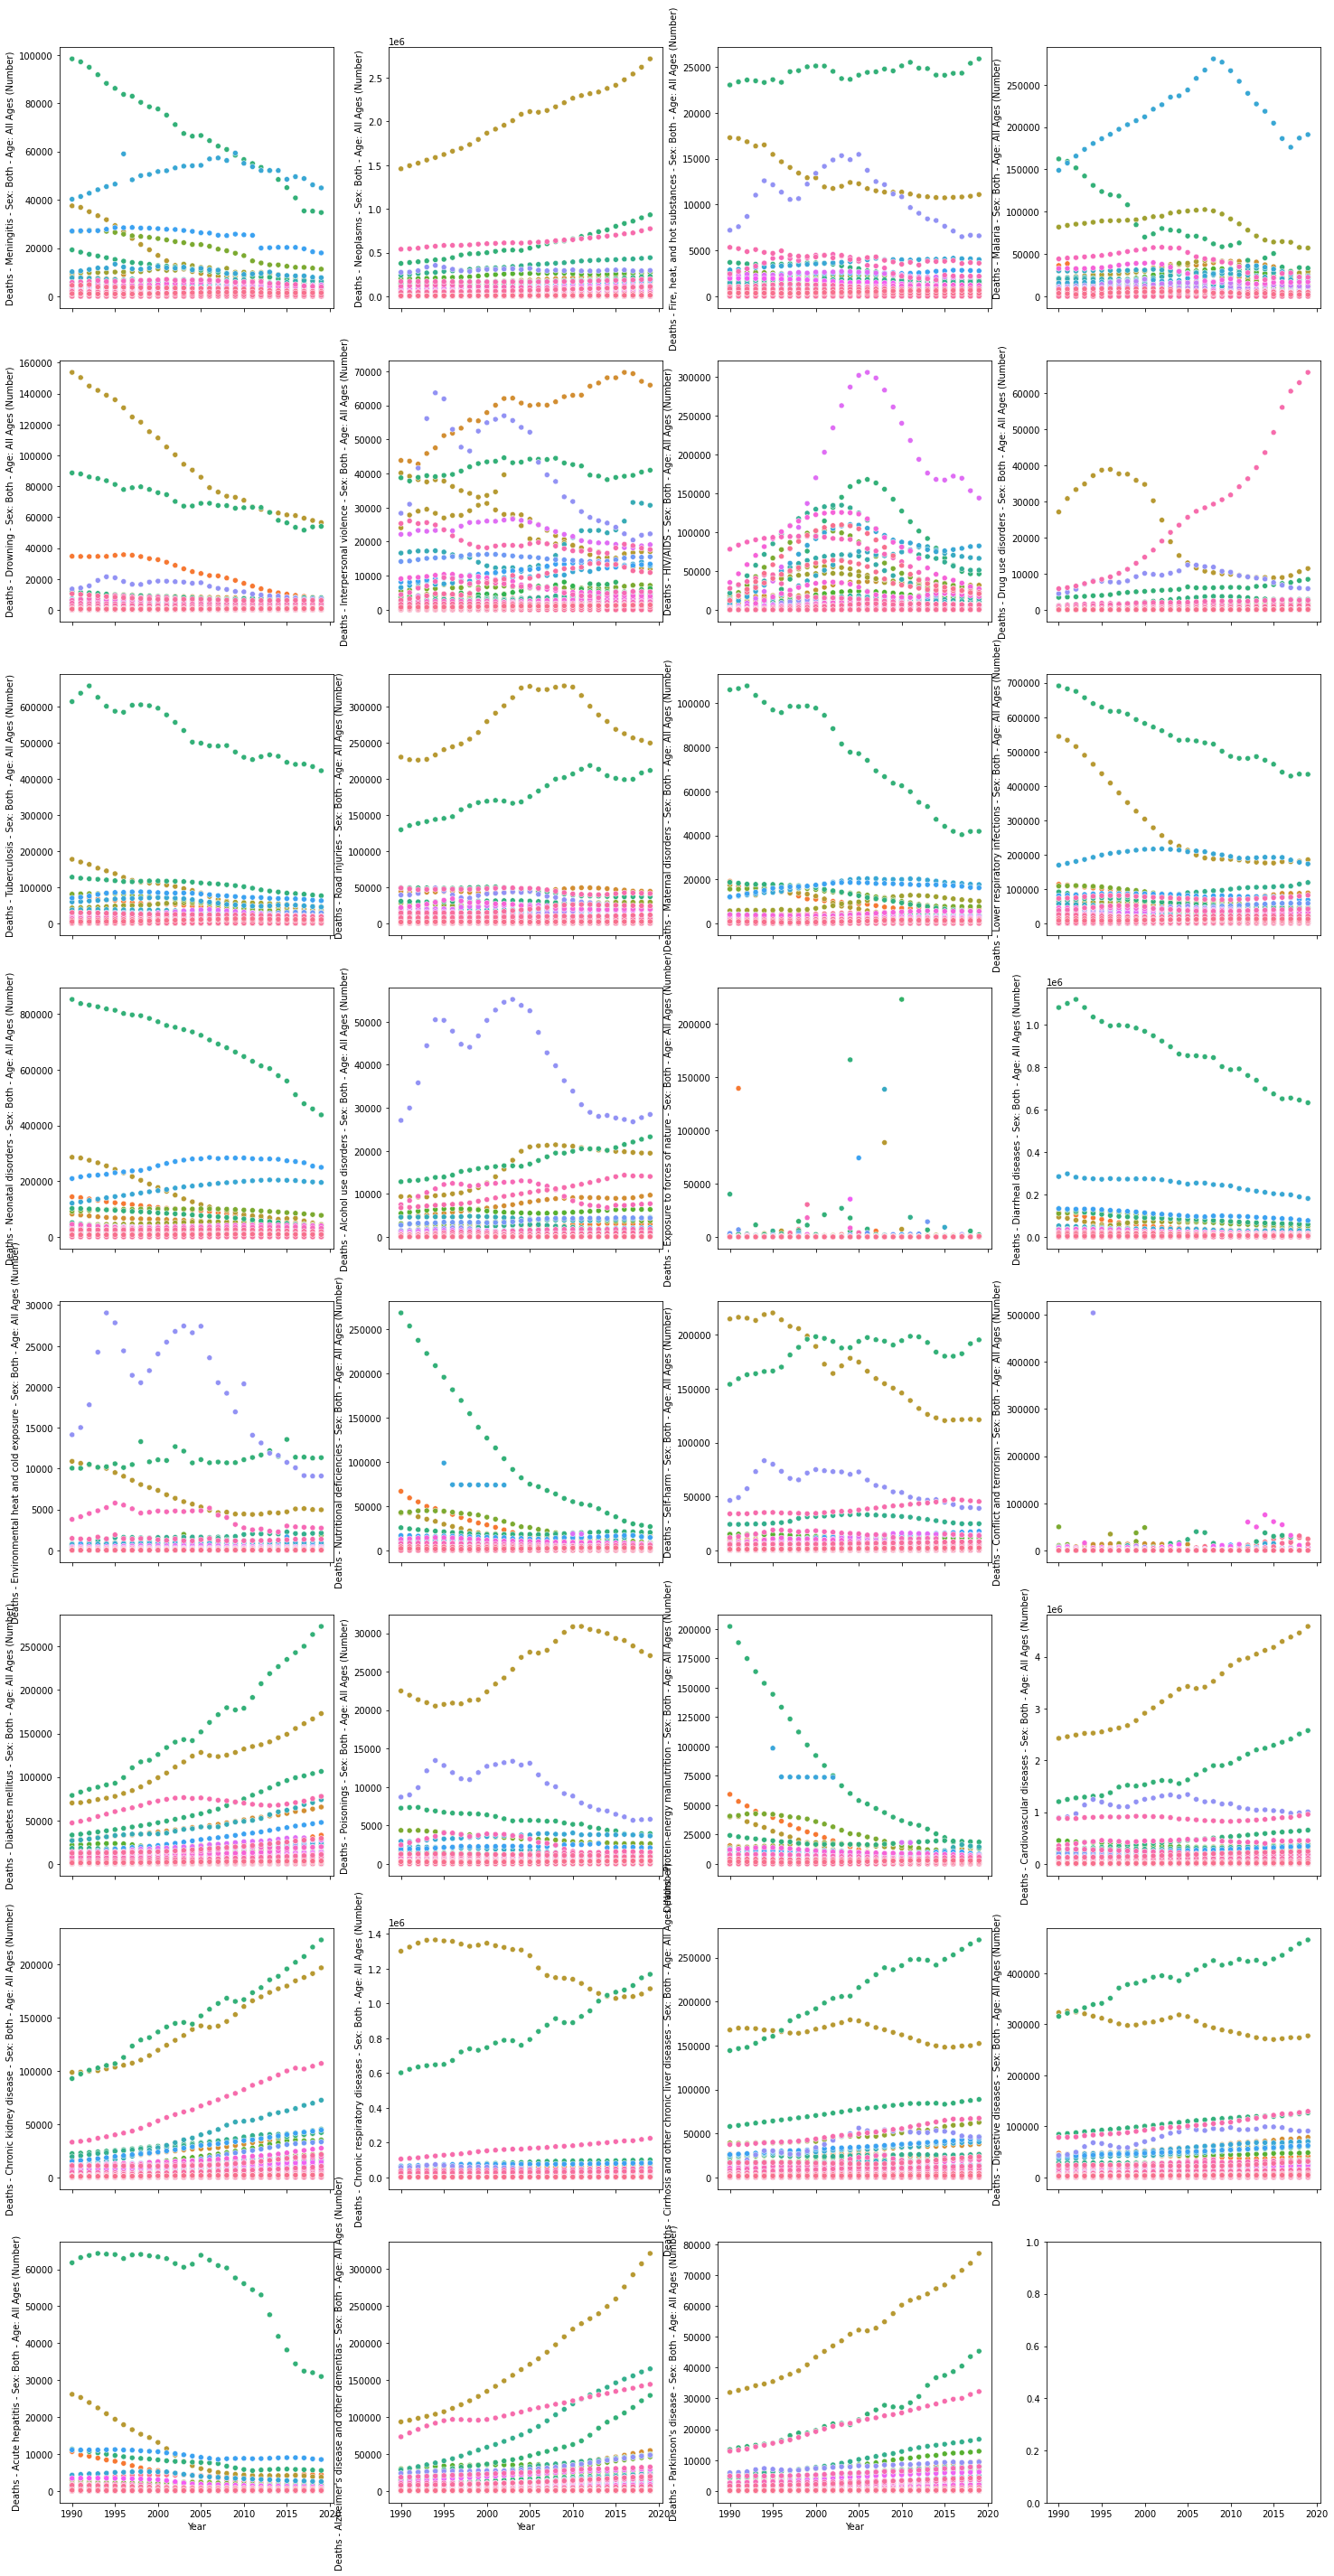

In [72]:
fig, ejes = plt.subplots(8,4, sharex=True, sharey=False, figsize = [25,50])
sns.scatterplot(data = MainData, x = "Year", y = MainData.columns[3], hue= "Entity", legend=False, ax=ejes[0,0])
sns.scatterplot(data = MainData, x = "Year", y = MainData.columns[4], hue= "Entity", legend=False, ax= ejes[0,1])
sns.scatterplot(data = MainData, x = "Year", y = MainData.columns[5], hue= "Entity", legend=False, ax= ejes[0,2])
sns.scatterplot(data = MainData, x = "Year", y = MainData.columns[6], hue= "Entity", legend=False, ax= ejes[0,3])
sns.scatterplot(data = MainData, x = "Year", y = MainData.columns[7], hue= "Entity", legend=False, ax= ejes[1,0])
sns.scatterplot(data = MainData, x = "Year", y = MainData.columns[8], hue= "Entity", legend=False, ax= ejes[1,1])
sns.scatterplot(data = MainData, x = "Year", y = MainData.columns[9], hue= "Entity", legend=False, ax= ejes[1,2])
sns.scatterplot(data = MainData, x = "Year", y = MainData.columns[10], hue= "Entity", legend=False, ax= ejes[1,3])
sns.scatterplot(data = MainData, x = "Year", y = MainData.columns[11], hue= "Entity", legend=False, ax= ejes[2,0])
sns.scatterplot(data = MainData, x = "Year", y = MainData.columns[12], hue= "Entity", legend=False, ax= ejes[2,1])
sns.scatterplot(data = MainData, x = "Year", y = MainData.columns[13], hue= "Entity", legend=False, ax= ejes[2,2])
sns.scatterplot(data = MainData, x = "Year", y = MainData.columns[14], hue= "Entity", legend=False, ax= ejes[2,3])
sns.scatterplot(data = MainData, x = "Year", y = MainData.columns[15], hue= "Entity", legend=False, ax= ejes[3,0])
sns.scatterplot(data = MainData, x = "Year", y = MainData.columns[16], hue= "Entity", legend=False, ax= ejes[3,1])
sns.scatterplot(data = MainData, x = "Year", y = MainData.columns[17], hue= "Entity", legend=False, ax= ejes[3,2])
sns.scatterplot(data = MainData, x = "Year", y = MainData.columns[18], hue= "Entity", legend=False, ax= ejes[3,3])
sns.scatterplot(data = MainData, x = "Year", y = MainData.columns[19], hue= "Entity", legend=False, ax= ejes[4,0])
sns.scatterplot(data = MainData, x = "Year", y = MainData.columns[20], hue= "Entity", legend=False, ax= ejes[4,1])
sns.scatterplot(data = MainData, x = "Year", y = MainData.columns[21], hue= "Entity", legend=False, ax= ejes[4,2])
sns.scatterplot(data = MainData, x = "Year", y = MainData.columns[22], hue= "Entity", legend=False, ax= ejes[4,3])
sns.scatterplot(data = MainData, x = "Year", y = MainData.columns[23], hue= "Entity", legend=False, ax= ejes[5,0])
sns.scatterplot(data = MainData, x = "Year", y = MainData.columns[24], hue= "Entity", legend=False, ax= ejes[5,1])
sns.scatterplot(data = MainData, x = "Year", y = MainData.columns[25], hue= "Entity", legend=False, ax= ejes[5,2])
sns.scatterplot(data = MainData, x = "Year", y = MainData.columns[26], hue= "Entity", legend=False, ax= ejes[5,3])
sns.scatterplot(data = MainData, x = "Year", y = MainData.columns[27], hue= "Entity", legend=False, ax= ejes[6,0])
sns.scatterplot(data = MainData, x = "Year", y = MainData.columns[28], hue= "Entity", legend=False, ax= ejes[6,1])
sns.scatterplot(data = MainData, x = "Year", y = MainData.columns[29], hue= "Entity", legend=False, ax= ejes[6,2])
sns.scatterplot(data = MainData, x = "Year", y = MainData.columns[30], hue= "Entity", legend=False, ax= ejes[6,3])
sns.scatterplot(data = MainData, x = "Year", y = MainData.columns[31], hue= "Entity", legend=False, ax= ejes[7,0])
sns.scatterplot(data = MainData, x = "Year", y = MainData.columns[32], hue= "Entity", legend=False, ax= ejes[7,1])
sns.scatterplot(data = MainData, x = "Year", y = MainData.columns[33], hue= "Entity", legend=False, ax= ejes[7,2])

# plt.xticks(rotation = 90);

In [73]:
MainData['Deaths - Meningitis - Sex: Both - Age: All Ages (Number)']


0       2159
1       2218
2       2475
3       2812
4       3027
        ... 
8005    1439
8006    1457
8007    1460
8008    1450
8009    1450
Name: Deaths - Meningitis - Sex: Both - Age: All Ages (Number), Length: 6120, dtype: int64

In [74]:
MainData['Deaths - Meningitis - Sex: Both - Age: All Ages (Number)'].index

Int64Index([   0,    1,    2,    3,    4,    5,    6,    7,    8,    9,
            ...
            8000, 8001, 8002, 8003, 8004, 8005, 8006, 8007, 8008, 8009],
           dtype='int64', length=6120)

## ANÁLISIS

### Año con más muertes

In [75]:
MuertesPorAnio = MainData.groupby("Year")[MainData.columns[3:]].sum().sum(axis = 1)

In [76]:
MuertesPorAnio = pd.DataFrame(MuertesPorAnio)

In [77]:
MuertesPorAnio.reset_index(inplace=True)

In [78]:
MuertesPorAnio.rename(columns = {0: "Suma"}, inplace=True)

In [79]:
MuertesPorAnio

,Year,Suma
0,1990,44126281
1,1991,44664946
2,1992,45061611
3,1993,45793726
4,1994,46780764
5,1995,46777909
6,1996,46917565
7,1997,47263351
8,1998,47656150
9,1999,48241369


(40000000.0, 70000000.0)

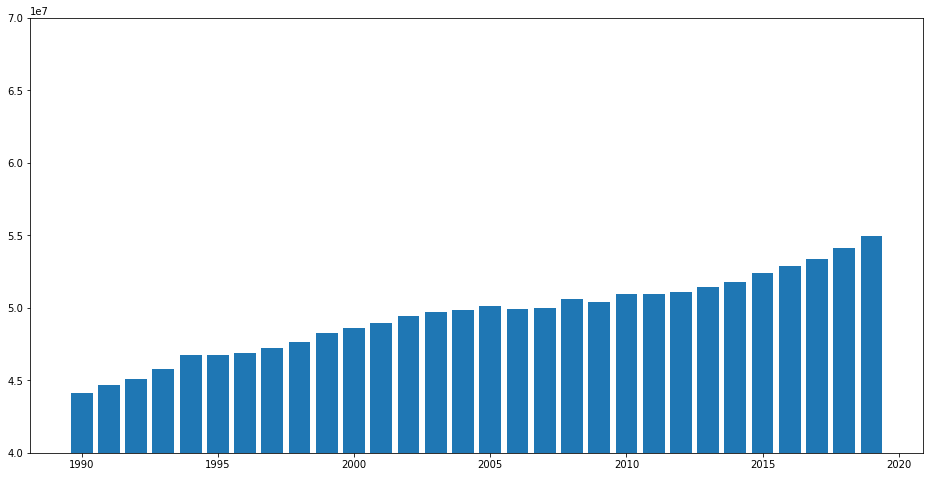

In [80]:
plt.figure(figsize = [16,8])
plt.bar(data = MuertesPorAnio, x = "Year", height = "Suma")
plt.ylim(bottom = 40000000, top = 70000000)

### Correlación de aumento de poblacion con aumento de muertes mundiales

(5000000000.0, 8000000000.0)

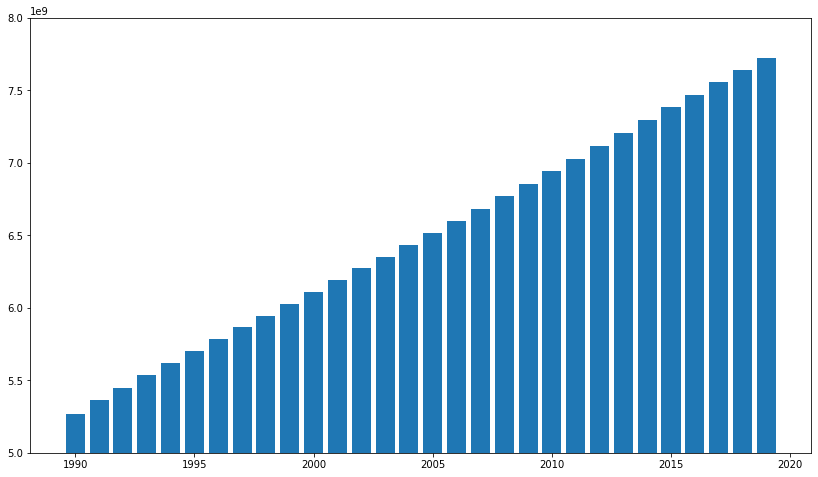

In [81]:
plt.figure(figsize = [14,8])
plt.bar(data = PoblacionMundial, x = "Year", height = "Poblacion")
plt.ylim(bottom = 5000000000, top = 8000000000)

In [82]:
CorrMuertesAnual_Poblacion = pd.merge(MuertesPorAnio, PoblacionMundial, on= "Year")

<AxesSubplot:>

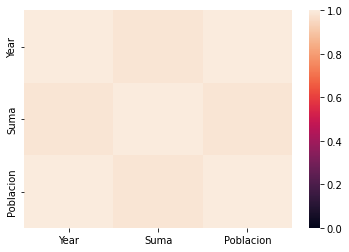

In [83]:
sns.heatmap(CorrMuertesAnual_Poblacion.corr(), vmin = 0)

In [84]:
PoblacionMundial["Poblacion"]

0     5269760000
1     5362591000
2     5449900000
3     5535472000
4     5619395000
5     5702061000
6     5784378000
7     5865912000
8     5947050000
9     6027575000
10    6107942000
11    6189856000
12    6271638000
13    6353177000
14    6434620000
15    6516883000
16    6599469000
17    6683363000
18    6768534000
19    6854661000
20    6941951000
21    7029255000
22    7116996000
23    7206400000
24    7294787000
25    7383240000
26    7469955000
27    7556993000
28    7642651000
29    7724928000
Name: Poblacion, dtype: int64

In [85]:
(MuertesPorAnio["Suma"]/PoblacionMundial["Poblacion"])*100

0     0.837349
1     0.832899
2     0.826834
3     0.827278
4     0.832488
5     0.820368
6     0.811108
7     0.805729
8     0.801341
9     0.800345
10    0.796075
11    0.790758
12    0.788582
13    0.781997
14    0.775054
15    0.769178
16    0.756895
17    0.748446
18    0.748130
19    0.735478
20    0.733823
21    0.724603
22    0.718381
23    0.714214
24    0.710162
25    0.709723
26    0.707950
27    0.705839
28    0.708033
29    0.711194
dtype: float64

In [86]:
PoblacionMundial["Poblacion"]/MuertesPorAnio["Suma"]

0     119.424522
1     120.062633
2     120.943301
3     120.878393
4     120.121916
5     121.896449
6     123.288112
7     124.111217
8     124.790819
9     124.946185
10    125.616249
11    126.460931
12    126.809887
13    127.877750
14    129.023203
15    130.008844
16    132.118685
17    133.610091
18    133.666589
19    135.966080
20    136.272558
21    138.006533
22    139.201829
23    140.014029
24    140.812898
25    140.899954
26    141.252933
27    141.675357
28    141.236363
29    140.608609
dtype: float64

In [87]:
MainData.shape

(6120, 34)